<a href="https://colab.research.google.com/github/komert-mario/MWIT_POSN_2020/blob/main/Testfitcurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

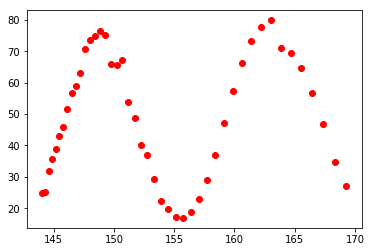

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

x = np.array([144.04105275565783,144.30284902067984,144.57663318408046,144.86251545082868,145.16061142654615,145.47104223459016,145.79393463955583,
 146.12942117743847,146.47764029271158,146.83873648259146,147.21286044877837,147.60016925697911,148.000826504537,148.41500249651452,
 148.84287443059438,149.28453685831388,149.74035798684903,150.21044995531037,150.695019569797,151.19428160023688,151.7084590272466,
 152.23778330108493,152.78249461329,153.34284218162608,153.91908454900545,154.5114898970923,155.12033637534006,155.7459124462602,
 156.3885172477729,157.0484609735423,157.72592799112468,158.42152275350384,159.13545737894108,159.86809047951755,160.6197939303347,
 161.39173425358442,162.1819687890083,162.99325499154642,163.8252422922862,164.67837708992025,165.55312253524974,166.44995922379246,
 167.36938592529228,168.31192035237564,169.27809997076008])
y= np.array([24.82, 25.22, 31.96, 35.8 ,
       38.96, 42.9 , 45.94, 51.52, 56.56, 59.04, 62.96, 70.72, 73.54,
       74.84, 76.52, 75.28, 66.  , 65.74, 67.36, 53.78, 48.66, 40.18,
       36.84, 29.18, 22.32, 19.68, 17.1 , 16.96, 18.94, 23.02, 29.  ,
       36.96, 47.26, 57.36, 66.22, 73.14, 77.66, 79.84, 70.88, 69.46,
       64.52, 56.58, 46.9 , 34.88, 27.04])


plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='red')
plt.show()

Parameters from fitting: a= -28.55, b= -25.51, c= -71.02, and d= 45.85
Covaraince parameters:  [[ 1.54363512 -0.05451764 -0.14567031  0.23820464]
 [-0.05451764  0.09924337  0.26624872 -0.12159484]
 [-0.14567031  0.26624872  0.71577975 -0.32993976]
 [ 0.23820464 -0.12159484 -0.32993976  0.83788038]]
Standard deviation error for a, b, c, and d:  [1.24243113 0.31502916 0.84603768 0.91535806]


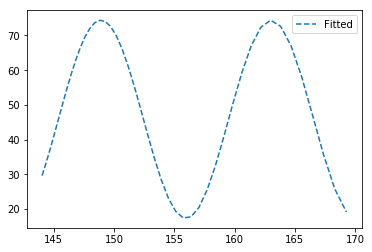

In [ ]:
def test_func(x, a, b, c, d):
    return a* np.sin(b*x*np.pi/180 -c) + d # a and b are values for optimization

params, params_covariance = optimize.curve_fit(test_func, x, y, p0=[1,2,3,4])

print'Parameters from fitting: a= %0.2f, b= %0.2f, c= %0.2f, and d= %0.2f'%(params[0],params[1],params[2],params[3])  
print'Covaraince parameters: ', params_covariance
print 'Standard deviation error for a, b, c, and d: ', np.sqrt(np.diag(params_covariance))

plt.figure(figsize=(6, 4))
plt.plot(x, test_func(x, params[0], params[1], params[2], params[3]),'--',label='Fitted')
plt.legend(loc='best') ## it can be fixed position of legend if you want

plt.show()

In [ ]:
!pip install lmfit


     |████████████████████████████████| 4.2MB 8.9MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 256kB 45.7MB/s 
  Created wheel for lmfit: filename=lmfit-0.9.15-cp27-none-any.whl size=88335 sha256=d4af4e5238cc8716254b1e1d6b754738d159e878d09336090bd29e31cadb324c
  Stored in directory: /root/.cache/pip/wheels/38/ef/1f/6db53cabb4f46dd2aaded20aba1a1fe5f56d0acf7297c937b8
  Created wheel for asteval: filename=asteval-0.9.17-cp27-none-any.whl size=17744 sha256=a29fc06af19592cb6320d73780d4182841dadb22dd8e8c0d09bfb247073023a1
  Stored in directory: /root/.cache/pip/wheels/49/74/b2/5b7bcf77e0eed2c654451c84b52d5c7d2fbd95c0e3b36efe0e
Successfully built lmfit asteval


In [ ]:
from lmfit import Model
import matplotlib.pyplot as plt

In [ ]:
'''
t = np.array([144.04105275565783,144.30284902067984,144.57663318408046,144.86251545082868,145.16061142654615,145.47104223459016,145.79393463955583,
 146.12942117743847,146.47764029271158,146.83873648259146,147.21286044877837,147.60016925697911,148.000826504537,148.41500249651452,
 148.84287443059438,149.28453685831388,149.74035798684903,150.21044995531037,150.695019569797,151.19428160023688,151.7084590272466,
 152.23778330108493,152.78249461329,153.34284218162608,153.91908454900545,154.5114898970923,155.12033637534006,155.7459124462602,
 156.3885172477729,157.0484609735423,157.72592799112468,158.42152275350384,159.13545737894108,159.86809047951755,160.6197939303347,
 161.39173425358442,162.1819687890083,162.99325499154642,163.8252422922862,164.67837708992025,165.55312253524974,166.44995922379246,
 167.36938592529228,168.31192035237564,169.27809997076008])

data= np.array([24.82, 25.22, 31.96, 35.8 , 38.96, 42.9 , 45.94, 51.52, 56.56, 59.04, 62.96, 70.72, 73.54,
74.84, 76.52, 75.28, 66.  , 65.74, 67.36, 53.78, 48.66, 40.18, 36.84, 29.18, 22.32, 19.68, 17.1 , 16.96, 18.94, 23.02, 29.,
36.96, 47.26, 57.36, 66.22, 73.14, 77.66, 79.84, 70.88, 69.46, 64.52, 56.58, 46.9 , 34.88, 27.04])

def sinefunction(x, a, b, c, d):
    return a* np.sin(b*x*np.pi/180 -c) + d 

smodel = Model(sinefunction)
result = smodel.fit(data, x=t, a=-28, b=-25, c=-71, d=46)

print(result.fit_report())

plt.plot(t, data, 'o', label='data')
plt.plot(t, result.best_fit, '--', label='fit')
plt.legend()
plt.show()
'''

"\nt = np.array([144.04105275565783,144.30284902067984,144.57663318408046,144.86251545082868,145.16061142654615,145.47104223459016,145.79393463955583,\n 146.12942117743847,146.47764029271158,146.83873648259146,147.21286044877837,147.60016925697911,148.000826504537,148.41500249651452,\n 148.84287443059438,149.28453685831388,149.74035798684903,150.21044995531037,150.695019569797,151.19428160023688,151.7084590272466,\n 152.23778330108493,152.78249461329,153.34284218162608,153.91908454900545,154.5114898970923,155.12033637534006,155.7459124462602,\n 156.3885172477729,157.0484609735423,157.72592799112468,158.42152275350384,159.13545737894108,159.86809047951755,160.6197939303347,\n 161.39173425358442,162.1819687890083,162.99325499154642,163.8252422922862,164.67837708992025,165.55312253524974,166.44995922379246,\n 167.36938592529228,168.31192035237564,169.27809997076008])\n\ndata= np.array([24.82, 25.22, 31.96, 35.8 , 38.96, 42.9 , 45.94, 51.52, 56.56, 59.04, 62.96, 70.72, 73.54,\n74.84, 76.52

0.15590275254143074
87.34504880674945
149.28453685831388
92.78


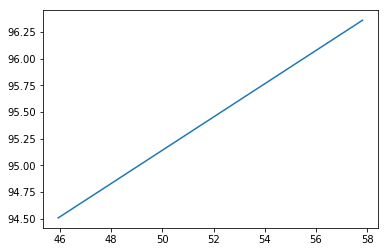

In [ ]:
#constants
bg_with= 2.4
bg_with= 2.5
t=1.58*(10**(-3))
ne=1.553
no=1.544
wl=633*(10**(-9))
pi=np.pi

def d(a):
    return t/(np.cos(np.radians(a)))
    
def PS(a):
    return (2*pi*d(a)*(ne-no)/wl)

x=[12.0022
,12.5023
,13.0024
,13.5025
,14.0026
,14.5027
,15.0028
,15.5029
,16.003
,16.5031
,17.0032
,17.5033
,18.0034
,18.5035
,19.0035
,19.5036
,20.0037
,20.5038
,21.0039
,21.504
,22.0041
,22.5042
,23.0043
,23.5044
,24.0045
,24.5046
,25.0047
,25.5048
,26.0049
,26.5049
,27.005
,27.5051
,28.0052
,28.5053
,29.0059
,29.5055
,30.0061
,30.5057
,31.0063
,31.5059
,32.0065
,32.5061
,33.0062
,33.5063
,34.0063
,34.5064
,35.0065
,35.5066
,36.0067
,36.5068
,37.0069
,37.507
,38.0071
,38.5072
,39.0073]
x1=np.array([PS(a) for a in x])
x1=np.array([i/np.pi for i in x1]) #rad to pi
y1=np.array([91.74
,92.78
,91.72
,90.58
,93.38
,92.34
,92.92
,93.46
,93.24
,94.7
,96.12
,98.02
,97.78
,99.36
,95.94
,95.72
,93.68
,93.44
,93.64
,91.74
,92.78
,91.72
,90.58
,93.38
,92.34
,92.92
,93.46
,93.24
,94.7
,96.12
,98.02
,97.78
,99.36
,100.14
,101.48
,103.12
,103.74
,103.62
,102.04
,103.16
,101.04
,95.08
,92.02
,97.38
,95.8
,93.9
,92.92
,88.82
,89.84
,88.24
,93.12
,89.02
,99.6
,100.24
,93.92])

#plt.plot(x,y)

m, b1 = np.polyfit(x1,y1,1)
plt.plot(x1,m*x1+b1)
print(m)
print(b1)
print(PS(19.0035))
print(y1[1])

In [ ]:
plt.rcParams['font.family']='Tahoma'

Parameters from fitting: a= -28.55, b= 80.14, c= 61.59, and d= 45.85
Covaraince parameters:  [[1.54361404 0.17122635 0.14563113 0.23818164]
 [0.17122635 0.97950358 0.8364541  0.38200439]
 [0.14563113 0.8364541  0.71578746 0.32994229]
 [0.23818164 0.38200439 0.32994229 0.83788014]]
Standard deviation error for a, b, c, and d:  [1.24242265 0.98969873 0.84604223 0.91535793]


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Tahoma'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


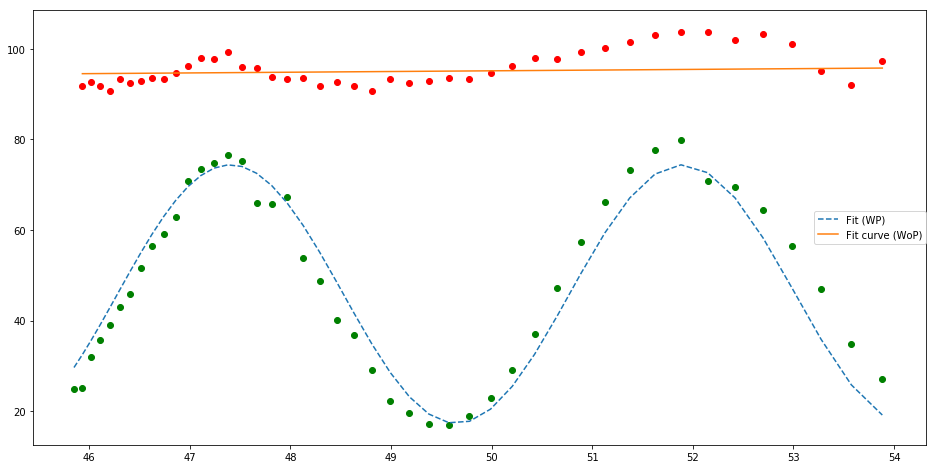

r_squared = 0.929236


In [ ]:
x = np.array([144.04105275565783,144.30284902067984,144.57663318408046,144.86251545082868,145.16061142654615,145.47104223459016,145.79393463955583,
 146.12942117743847,146.47764029271158,146.83873648259146,147.21286044877837,147.60016925697911,148.000826504537,148.41500249651452,
 148.84287443059438,149.28453685831388,149.74035798684903,150.21044995531037,150.695019569797,151.19428160023688,151.7084590272466,
 152.23778330108493,152.78249461329,153.34284218162608,153.91908454900545,154.5114898970923,155.12033637534006,155.7459124462602,
 156.3885172477729,157.0484609735423,157.72592799112468,158.42152275350384,159.13545737894108,159.86809047951755,160.6197939303347,
 161.39173425358442,162.1819687890083,162.99325499154642,163.8252422922862,164.67837708992025,165.55312253524974,166.44995922379246,
 167.36938592529228,168.31192035237564,169.27809997076008])
x=np.array([j/np.pi for j in x]) #rad to pi
y= np.array([24.82, 25.22, 31.96, 35.8 ,
       38.96, 42.9 , 45.94, 51.52, 56.56, 59.04, 62.96, 70.72, 73.54,
       74.84, 76.52, 75.28, 66.  , 65.74, 67.36, 53.78, 48.66, 40.18,
       36.84, 29.18, 22.32, 19.68, 17.1 , 16.96, 18.94, 23.02, 29.  ,
       36.96, 47.26, 57.36, 66.22, 73.14, 77.66, 79.84, 70.88, 69.46,
       64.52, 56.58, 46.9 , 34.88, 27.04])

def test_func(x, a, b, c, d):
    return a* np.sin(b*x*np.pi/180 -c) + d # a and b are values for optimization

params, params_covariance = optimize.curve_fit(test_func, x, y, p0=[1,2,3,4])

print'Parameters from fitting: a= %0.2f, b= %0.2f, c= %0.2f, and d= %0.2f'%(params[0],params[1],params[2],params[3])  
print'Covaraince parameters: ', params_covariance
print 'Standard deviation error for a, b, c, and d: ', np.sqrt(np.diag(params_covariance))

plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='green')
plt.scatter(x1[:-11],y1[:-11] ,color='red')
plt.plot(x, test_func(x, params[0], params[1], params[2], params[3]),'--',label='Fit (WP)')
plt.legend(loc='best') ## it can be fixed position of legend if you want

plt.plot(x1[:-11], m*x1[:-11]+b1 ,label='Fit curve (WoP)')
plt.legend(loc='center right', borderaxespad=0.)
##plt.gca(title='The graph show the angle that rotation of Quater Wave Olate between Intensity(mV)')
plt.show()
residuals = y- test_func(x, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print('r_squared = %f' %r_squared)

In [ ]:
18.5035,76.52
30.0056,79.84
(PS(30.0056)-PS(18.5035))/np.pi

4.50420602581397